# Analyzing Movie Reviews
Analyzing movie reviews to determine if there is a bias among different movie rating websites. 

In [40]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [3]:
print(movies.shape)
print(movies.columns)
print(movies.describe())

(146, 22)
Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')
       RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   5

## Analyzing Reviews between Metacritic and Fandango

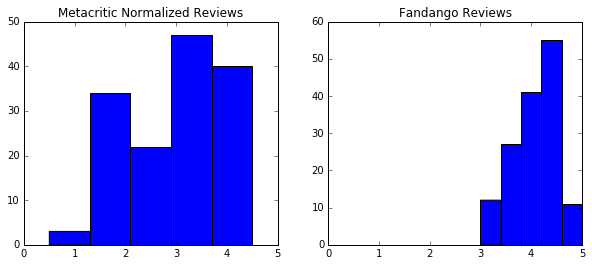

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
for ax in axes:
    ax.set_xlim(0,5)
axes[0].set_title("Metacritic Normalized Reviews")
axes[0].hist(movies['Metacritic_norm_round'],5)
axes[1].set_title("Fandango Reviews")
axes[1].hist(movies['Fandango_Stars'],5)
plt.show()

Fandango appears to be skewed negatively while Metacritic appears to not have a skew. Fandango ratings are always over 3.

In [17]:
print('Fandango Stars Descriptive Stats')
print(movies['Fandango_Stars'].describe())
print('\nMetacritic Descriptive Stats')
print(movies['Metacritic_norm_round'].describe())
movies['Metacritic_norm_round']

Fandango Stars Descriptive Stats
count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

Metacritic Descriptive Stats
count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64


0      3.5
1      3.5
2      3.0
3      1.0
4      1.5
5      2.5
6      2.5
7      4.0
8      4.0
9      4.0
10     3.5
11     3.0
12     4.5
13     3.0
14     3.5
15     1.5
16     2.5
17     3.0
18     2.5
19     1.5
20     3.0
21     2.5
22     3.0
23     3.0
24     4.0
25     4.5
26     4.0
27     3.5
28     4.0
29     4.0
      ... 
116    4.0
117    4.0
118    3.0
119    4.5
120    4.0
121    3.5
122    4.5
123    3.0
124    3.0
125    2.0
126    2.5
127    3.0
128    4.0
129    4.5
130    3.0
131    3.0
132    2.5
133    0.5
134    1.5
135    1.5
136    2.0
137    3.0
138    2.5
139    2.0
140    4.5
141    3.5
142    4.0
143    4.5
144    4.5
145    3.5
Name: Metacritic_norm_round, dtype: float64

**Mean and Median**

Fandango's median is 4 which is lower than its Mean of 4.089 which is caused by the skewness of the data to the right. However, it is still very close.
Metacritic median of 3 is higher than the mean of 2.973 which is caused by a few lower reviews bring down the mean. 

**Standard Deviation**

Fandango has a lower standard deviation of .540 while Metacritic has a std of .991 . This gives us a hint that Fandangos reviews do not vary as much as Metacritics reviews do and we can see this in the Histograms above.

** Why are Fandango's reviews higher and less variant**
I wasn't able to find the Fandango review methodology on the Fandango website. I did find a good amount of claims (and our data seems to support this so far) that Fandango rounds up their movie ratings.

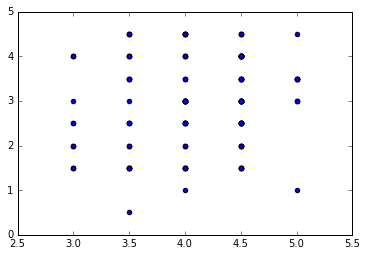

In [18]:
plt.scatter(x=movies['Fandango_Stars'],y=movies['Metacritic_norm_round'])

In [19]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']

In [22]:
movies['fm_diff'] = movies['fm_diff'].apply(lambda x : abs(x))

In [36]:
movies.sort_values('fm_diff',ascending=False)[0:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


### Exploring Correlation and Prediction for Fandango Stars and Metacritic Reviews

In [43]:
r_value, p_value = stats.pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])

r_value

0.17844919073895918

This is a fairly low correlation coefficient. This suggest that Fandango and Metacritic reviews are quite different and do not align with each other.

In [82]:
slope, intercept, r_value, p_value, stderr_slope = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [83]:
pred_3 = 3*slope + intercept
pred_3

4.0917071528212041

In [84]:
print(1*slope + intercept)
print(5*slope + intercept)

3.89708499687
4.28632930877


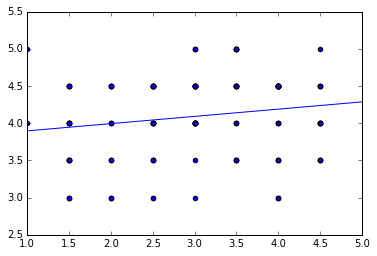

In [86]:
plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
pred_x = [1,5]
pred_y = [i*slope + intercept for i in x]
plt.plot(pred_x,pred_y)
plt.xlim(1,5)
plt.show()
